### Problem Statement
##### This Dataset is based on Logisitics Systems and the data that is collected from their performance. This project aims to leverage that data science techniques on this dataset to:

###### 1. Predict delivery delays using status/dates/distance
###### 2. Optimize carrier selection based on cost/transit time
###### 3. Detect anomalies in shipment weights/costs
###### 4. Forecast shipping expenses by route

#### Understanding the dataset

In [1]:
# import libraries to be used in the project

# Pandas is used for data manipulation and analysis
import pandas as pd
# numpy is used to work with arrays and matrices, which makes it easier to handle numerical data
import numpy as np
# matplotlib is a graph plotting library used for visualization
import matplotlib.pyplot as plt
# sklearn library is a module used to simplify building machine learning models in python
# model_selection is used to import tools like cross validation and hyper-parameter tuning
#train_test_split splits the dataset into two parts, one used to train the model and the other part to test the model
from sklearn.model_selection import train_test_split
# ensemble is used to import statistical methods for classification, regression and anomaly detection
# in this case we are importing randomforestclassifier as our classifier algorithm
from sklearn.ensemble import RandomForestClassifier
# metrics is used for performance metrics, score functions etc
# classification report Builds a text report showing the main classification metrics.
# roc_auc_score Computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import classification_report, roc_auc_score

In [2]:
# Load dataset into a data frame
df = pd.read_csv("./logistics_shipments_dataset.csv")

# Output sample of the database to learn its structure 
df.head()

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3


##### Preliminary Dataset Analysis

In [3]:
# Size of the dataset (rows, columns)
df.shape

(2000, 11)

In [4]:
# Various information about the dataset, including range of entries and number of items in each column and their data type
df.info()

# Perform Statistical analysis on the entire dataset, measures of central tendency, dispersion and calculating Quartiles
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shipment_ID       2000 non-null   object 
 1   Origin_Warehouse  2000 non-null   object 
 2   Destination       2000 non-null   object 
 3   Carrier           2000 non-null   object 
 4   Shipment_Date     2000 non-null   object 
 5   Delivery_Date     1968 non-null   object 
 6   Weight_kg         2000 non-null   float64
 7   Cost              1959 non-null   float64
 8   Status            2000 non-null   object 
 9   Distance_miles    2000 non-null   int64  
 10  Transit_Days      2000 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days
count,2000,2000,2000,2000,2000,1968,2000.000000,1959.000000,2000,2000.000000,2000.000000
unique,2000,10,15,7,364,368,NaN,NaN,5,NaN,NaN
top,SH10000,Warehouse_LA,Chicago,LaserShip,2023-10-04,2023-06-07,NaN,NaN,Delivered,NaN,NaN
freq,1,220,154,303,15,12,NaN,NaN,1648,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,30.184800,205.161598,NaN,1275.868000,4.182500
std,NaN,NaN,NaN,NaN,NaN,NaN,124.967053,222.586082,NaN,691.382829,1.837902
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,17.890000,NaN,101.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,12.300000,117.710000,NaN,690.250000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,20.700000,196.420000,NaN,1262.500000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,33.925000,272.115000,NaN,1867.250000,5.000000


#### Cleaning and making data ready for use in further analysis

In [5]:
# Locate Missing values
# isnull returns a boolean dataset that is a mirror of the original where empty/missing values show up as True, filled as False
# sum returns a column wise index where all the missing values in a column are shown in a numeric value
# sort_values then sorts the output index in desceding order, showing where the bulk of the missing values are
df.isnull().sum().sort_values(ascending=False)

Cost                41
Delivery_Date       32
Shipment_ID          0
Origin_Warehouse     0
Destination          0
Carrier              0
Shipment_Date        0
Weight_kg            0
Status               0
Distance_miles       0
Transit_Days         0
dtype: int64

In [6]:
# Locate Duplicated values
# duplicated returns each index of the dataset along with a boolean value that tells whether record has been duplicated or not(True if yes)
# sum will return the total number of duplicated entries
df.duplicated().sum()

0

###### We can see there are zero duplicate values

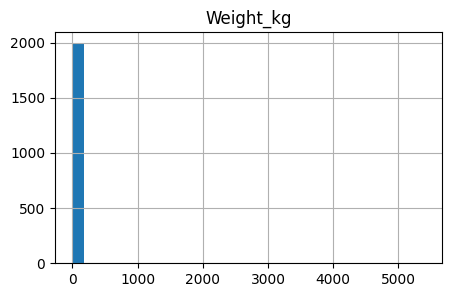

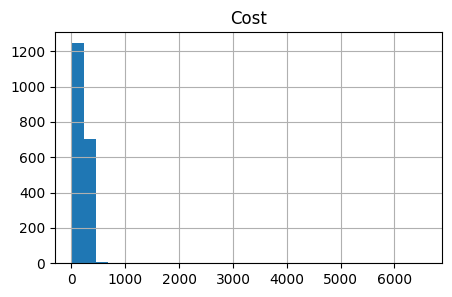

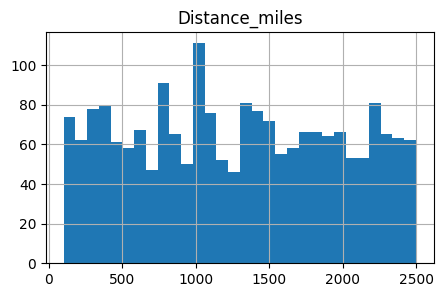

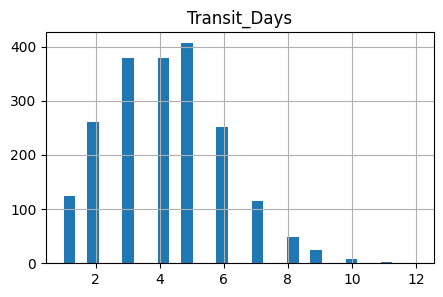

In [7]:
# select the data columns with numerical data
# columns will return a list of the column names with numerical data
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    # create four plots/graphs of defined size using figsize parameter
    plt.figure(figsize=(5,3))
    # represent numerical data defined as histogram, bins parameter in the interval size
    # x axis is the numerical value of the record in that column, y axis is the frequency of that numerical value range
    df[col].hist(bins=30)
    # title of each plot will be column name
    plt.title(col)
    # show tue plots created
    plt.show()
# this helps in seeing the numerical distribution of each numerical category in a visualized format and see where the data is centered

In [8]:
# convert any date/time from object to datetime value to change their data type 
date_cols = [col for col in df.columns if 'date' in col.lower()]

for col in date_cols:
    # to date_datetime function in pandas library helps us change the data type, this is helpful as datetime will now not reflect in categorical analysis of our data
    df[col] = pd.to_datetime(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Shipment_ID       2000 non-null   object        
 1   Origin_Warehouse  2000 non-null   object        
 2   Destination       2000 non-null   object        
 3   Carrier           2000 non-null   object        
 4   Shipment_Date     2000 non-null   datetime64[ns]
 5   Delivery_Date     1968 non-null   datetime64[ns]
 6   Weight_kg         2000 non-null   float64       
 7   Cost              1959 non-null   float64       
 8   Status            2000 non-null   object        
 9   Distance_miles    2000 non-null   int64         
 10  Transit_Days      2000 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 172.0+ KB


In [9]:
# similar to isolating a list of numerical value columns, we also make a list for categorical value columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    # output each category in each column and the frequency of that category in that column, limit output to ten categories of each column
    print("\n", col)
    print(df[col].value_counts().head(10))


 Shipment_ID
Shipment_ID
SH10000    1
SH11329    1
SH11342    1
SH11341    1
SH11340    1
SH11339    1
SH11338    1
SH11337    1
SH11336    1
SH11335    1
Name: count, dtype: int64

 Origin_Warehouse
Origin_Warehouse
Warehouse_LA     220
Warehouse_SF     215
Warehouse_HOU    212
Warehouse_ATL    207
Warehouse_MIA    201
Warehouse_CHI    197
Warehouse_DEN    196
Warehouse_BOS    192
Warehouse_SEA    190
Warehouse_NYC    170
Name: count, dtype: int64

 Destination
Destination
Chicago          154
Phoenix          148
Minneapolis      148
Portland         146
Denver           142
Detroit          141
Dallas           137
Atlanta          133
San Francisco    129
Los Angeles      127
Name: count, dtype: int64

 Carrier
Carrier
LaserShip           303
OnTrac              299
FedEx               295
USPS                292
DHL                 281
Amazon Logistics    274
UPS                 256
Name: count, dtype: int64

 Status
Status
Delivered     1648
Delayed        199
In Transit      76

##### Correlation Analysis between numerical Data in the Dataset
###### We try to find out how two different attributes or columns could have some sort of relationship

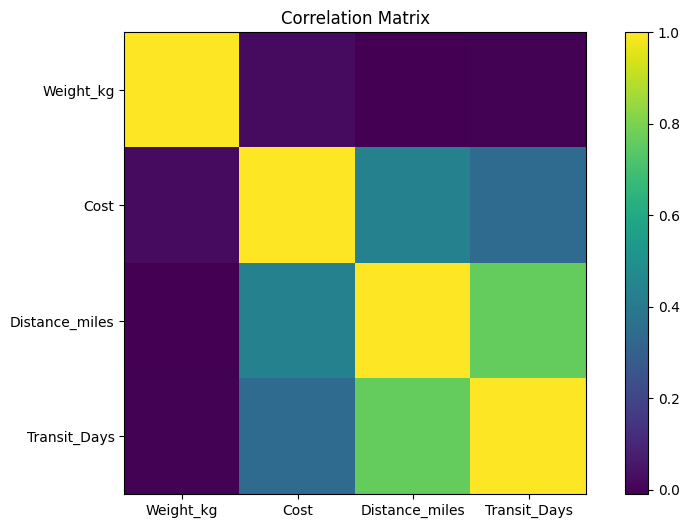

In [10]:
# corr outputs a matrix in which each numerical column will show correlation value against other numerical columns
# the higher the value, the higher the correlation between the two and vice versa
corr = df[num_cols].corr()

# ready a graph to be plotted
plt.figure(figsize=(10,6))
# output the correlation matrix as a sort of heat graph
plt.imshow(corr)
# output the heat index to the side of the graph for better understanding 
plt.colorbar()
# change the axis values from numerical correlation value to the category name for better understanding
plt.xticks(range(len(corr.columns)), corr.columns)
# similar to previous line, do it for y axis as well
plt.yticks(range(len(corr.columns)), corr.columns)
# Add a title to the graph
plt.title("Correlation Matrix")
# show the graph
plt.show()
# you can see the correlation between columns against themselves is the highest, ie, 1
# the lighter the color the higher the correlation


##### Handle missing values

In [11]:
# use measure of central tendency to fill up missing values
# in this case, we will use median for numerical column and mode for categorical column

for col in num_cols:
    # fillna fills all empty values in the column with the specified attribute inside
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    # since there can be more than one mode for any given column we will take the 0th index of them
    df[col] = df[col].fillna(df[col].mode()[0])


In [12]:
# Handle duplicates
df = df.drop_duplicates()

###### Now, we have handled missing and duplicate values. But, in our earlier analysis of the data we can see that even the delivery date column has missing values. Since delivery date(datetime) is neither object(categorical) or number(numerical), How do we handle that?
###### One way is to handle the missing delivery dates as packages or cargo that hasn't been delivered yet.
###### So we will create a flag that will tell us whether package has been delivered or not and add it to the dataset.

In [13]:
# create a new column is_delivered and check will notna if record if null for delivery date column or not
# notna returns true if value is not missing and false if it is 
# convert boolean to int (optional step, for easier handling of data)
df['is_delivered'] = df['Delivery_Date'].notna().astype(int)
df.head(5)

,Shipment_ID,Origin_Warehouse,Destination,Carrier,Shipment_Date,Delivery_Date,Weight_kg,Cost,Status,Distance_miles,Transit_Days,is_delivered
0,SH10000,Warehouse_MIA,San Francisco,UPS,2023-10-02,2023-10-04,25.7,67.46,Delivered,291,2,1
1,SH10001,Warehouse_MIA,Atlanta,DHL,2023-12-06,2023-12-09,38.9,268.85,Delivered,1225,3,1
2,SH10002,Warehouse_LA,Houston,DHL,2023-09-18,2023-09-20,37.2,74.35,Delivered,220,2,1
3,SH10003,Warehouse_BOS,Seattle,OnTrac,2023-01-26,2023-02-04,42.6,187.04,Delivered,1156,9,1
4,SH10004,Warehouse_SF,Dallas,OnTrac,2023-06-03,2023-06-06,7.9,120.01,Delivered,1017,3,1


##### Outlier Detection
###### For detecting outliers we will define a lower fence and a higher fence using quartiles(IQR) and any value outside of that range will be considered as an outlier

In [14]:
# start by defining a function that will take data and calculate iqr(Q3 - Q1) based on that and then calculate low and high fence
# any outliers outside this range will then be removed
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    low_fence = Q1 - 1.5 * IQR
    high_fence = Q3 + 1.5 * IQR
    return data[(data[column] >= low_fence) & (data[column] <= high_fence)]

# update the dataframe using outlier removal function
for col in num_cols:
    df = remove_outliers_iqr(df, col)


In [15]:
df.shape

(1852, 12)

###### We can see 148 rows were removed from the initial 2000 rows (7.4%) of our data. 

##### Encode Categorical values (For later analysis)

In [16]:
# this will change dataset into a matrix of sorts will each categorical column and each category within that column will merge to become a new column
# this new column will have only boolean values
df_encoded = pd.get_dummies(df, drop_first=True)

In [17]:
df_encoded.shape

(1852, 1891)

###### We can see amount of columns increased by a lot, this encoded dataframe is only for ML models to read and perform analysis on
###### Original dataframe(after cleaning and adding features) is still preserved as it is the human readable one 

In [18]:
df_encoded.head(5)

,Shipment_Date,Delivery_Date,Weight_kg,Cost,Distance_miles,Transit_Days,is_delivered,Shipment_ID_SH10001,Shipment_ID_SH10002,Shipment_ID_SH10004,...,Carrier_DHL,Carrier_FedEx,Carrier_LaserShip,Carrier_OnTrac,Carrier_UPS,Carrier_USPS,Status_Delivered,Status_In Transit,Status_Lost,Status_Returned
0,2023-10-02,2023-10-04,25.7,67.46,291,2,1,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,2023-12-06,2023-12-09,38.9,268.85,1225,3,1,True,False,False,...,True,False,False,False,False,False,True,False,False,False
2,2023-09-18,2023-09-20,37.2,74.35,220,2,1,False,True,False,...,True,False,False,False,False,False,True,False,False,False
4,2023-06-03,2023-06-06,7.9,120.01,1017,3,1,False,False,True,...,False,False,False,True,False,False,True,False,False,False
5,2023-09-13,2023-09-16,9.1,143.26,898,3,1,False,False,False,...,False,True,False,False,False,False,True,False,False,False


##### Feature Engineering

In [19]:
# basically in this step, we try to create new attributes to get further inferences out of our data.
# Since we have Shipment date and delivery date in the dataset, we can calculate the delivery time taken by delivery - shipment, and add that as an additional column to the dataset

if 'Shipment_Date' in df.columns and 'Delivery_Date' in df.columns:
    # subtract the two dates and then convert into days
    df['delivery_days'] = (df['Delivery_Date'] - df['Shipment_Date']).dt.days

In [20]:
# Cost efficiency
# we use if statements to ensure that our dataset is robust, right now in this controlled dataset it doesn't matter as much 
# but in production grade datasets and data science techniques, this is good practice
if 'Distance_miles' in df.columns and 'Cost' in df.columns:
    df['Cost_per_mile'] = df['Cost']/df['Distance_miles']
    
# Time features - add month and day of the shipment date and delivery date 
for col in date_cols:
    df[f"{col}_month"] = df[col].dt.month
    df[f"{col}_dayofweek"] = df[col].dt.dayofweek

In [21]:
# route will tell us start point and end point of the cargo together
df['Route'] = df['Origin_Warehouse'] + '_' + df['Destination']

# check if package is delayed by comparing transit days and delivery days
df['is_delayed'] = (df['delivery_days'] > df['Transit_Days']).astype(int)

#output sum of delayed packages
df['is_delayed'].sum()

181

In [22]:
# now we try to analyze packages delivery time/delay and weigh that against carrier category so we can see which carrier might have delays historically
# groupby groups the data according the group category mentioned in the parameter
# calculate mean of is_delayed records so we can infer carriers with higher mean delay have more delayed deliveries
carrier_delay = df.groupby('Carrier')['is_delayed'].mean()
# map function will map the value of that carrier to all records of that particular carrier
df['Carrier_delay_rate'] = df['Carrier'].map(carrier_delay)

# similarly we can also mean of costs across different carriers as that is a helpful metric to judge carriers
# even though routes of carriers maybe different and that may affect the mean, we can still get a high level overview of carriers average earnings
# not using this to measure efficiency
carrier_cost = df.groupby('Carrier')['Cost'].mean()
df['Carrier_avg_cost'] = df['Carrier'].map(carrier_cost)

# now we calculate route performace metrics, days per route and cost per route
route_avg_days = df.groupby('Route')['delivery_days'].mean()
df['Route_avg_days'] = df['Route'].map(route_avg_days)
 
route_avg_cost = df.groupby('Route')['Cost'].mean()
df['Route_avg_cost'] = df['Cost'].map(route_avg_cost)

# add a weight bucket category that will classify different weights of cargo as heavy, medium or light
# we will use qcut method to put 25% of data in each bucket
df['Weight_bucket'] = pd.qcut(
    df['Weight_kg'],
    q=4,
    labels = ['Light', 'Medium', 'Heavy', 'Very_heavy']
)

In [23]:
#encode the dataframe for ml analysis, we will just update the one we created earlier
df_encoded = pd.get_dummies(df, drop_first=True)

#### Use case modeling
###### Finally we come to tackling the problem statement, lets get started
##### Predict delivery delays using status/dates/distance

###### Note: you cannot train most ML models with datetime datatype. So we will need to drop the datetime data from our encoded dataframe

In [24]:
# get the column names with datetime data type
date_time_cols = df_encoded.select_dtypes(include='datetime64[ns]').columns
# drop the date time columns from encoded dataframe
df_encoded = df_encoded.drop(columns=date_time_cols)

In [25]:
# X is the input into the model
# y is the value we are trying to predict using the model
# we are dropped the is_delayed flag because we want to predict the delay, not give the answer to the model
X = df_encoded.drop(['is_delayed'], axis=1)
y = df_encoded['is_delayed']

# split the dataset into train and test splits for the model to work on
# the size of test split is 20% and train split is 80%
# random state is used to set a point to tell where to split the data from, so even though the data split is random, it will always be the exact same shuffle and split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# now we define and train our model
delay_model = RandomForestClassifier(n_estimators=250, random_state=42)
# fit builds a forest of trees from the training set
delay_model.fit(X_train, y_train)

# predict returns 0,1 value for the delay flag
# predict proba returns probability of either delay or not so it may be [0.15, 0.85], but predict will give one hard value only
preds = delay_model.predict(X_test)
probs = delay_model.predict_proba(X_test)[:,-1]

# this is to judge the model's performance and if it is working as intended
# print the classification report using inbuilt sklearn library function
print(classification_report(y_test, preds))
# print the roc_auc_score as well
# ROC AUC score is a better metric than accuracy as it checks model performance at different thresholds of prediction probability and plots a graph against that
# the area under the curve is the score for the model, if it is closer to 1, that means performance model is great
print("ROC AUC:", roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       326
           1       1.00      0.69      0.82        45

    accuracy                           0.96       371
   macro avg       0.98      0.84      0.90       371
weighted avg       0.96      0.96      0.96       371

ROC AUC: 0.9974778459441036


###### Here we can see a bunch of data. Let's try to infer some findings from the same. for 326 records of non delayed shipments, we can see the model was 96% accurate(precision), that is, 96% of records that the model flagged non delayed were actually non delayed and it caught all of the records that were not delayed(recall). for 45 records it was a whopping 100% accurate(precision), BUT it only caught 69% of the actual delayed deliveries(recall).
###### This tells us a bit about the model. We can infer that it is a bit conservative and cautious when classfying a delivery as delayed, so it lets some of them through. It only flags delays when extremely sure of it.
###### Overall accuracy was 96%.
###### Model ROC AUC score is very high, that tells us that the model can classify between delayed and non delayed data very well.
###### To improve recall for delayed shipments, there are a number of options that can be done, the easiest one is to lower the probability threshold for the model to classify a delivery as delayed. this will take into account the delayed deliveries even if the model is less sure about them.
###### lets try and acheive around 85-90% recall for delayed shipments.

In [26]:
# default threshold to classify the delayed shipment is 0.5, lets try and set it to 0.25 to see what happens
# the prediction probability greater than threshold will be considered 
threshold = 0.25
pred_custom = (probs >= threshold).astype(int)

print(classification_report(y_test, pred_custom))
print("ROC AUC:", roc_auc_score(y_test, probs))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       326
           1       0.96      0.96      0.96        45

    accuracy                           0.99       371
   macro avg       0.97      0.97      0.97       371
weighted avg       0.99      0.99      0.99       371

ROC AUC: 0.9974778459441036


###### We can see the recall and precision and overall accuracy of the model improved by a lot. This way, we take into account the dact that our model is cautious and conservative and use that to our knowlegde to better use it on our data.

#### Optimize carrier selection based on cost/transit time using a scorecard